Selection des données

In [149]:
import pandas as pd

df1 = pd.read_csv('datasets/fires.csv', header=0)
df2 = pd.read_csv('datasets/formatted-weather2.csv', header=0, usecols=['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall'])


KeyboardInterrupt: 

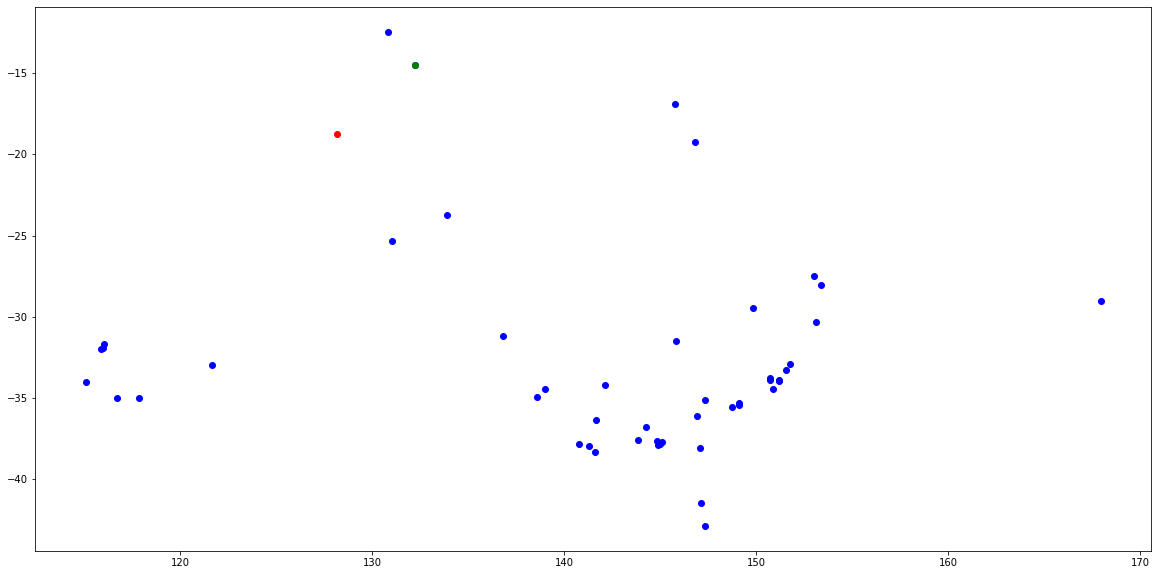

In [154]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1, lat2, lon1, lon2):
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    

    r = 6371
      
    return(c * r)

def find_nearest_station(longitude,latitude):
    station = {'ville': 'unknwon','distance': 1000000000}
    for ind in range(len(cities)):
        d = distance(latitude,df3['Latitude'][ind],longitude,df3['Longitude'][ind])
        if(d < station['distance']):
            station["ville"] = cities[ind]
            station["distance"] = d

    return station['ville']




plt.scatter(df1['longitude'][10000],df1['latitude'][10000],c='red')

plt.scatter(df3['Longitude'],df3['Latitude'],c='blue')

station = df3.loc[df3['City'] == find_nearest_station(df1['longitude'][10000],df1['latitude'][10000])]
plt.scatter(station['Longitude'],station['Latitude'],c='green')
station = station.values.tolist()
rain = df2[(df2['Location'] == station[0][0])]
rain = rain[(rain['Date'] == df1['acq_date'][10000])]

fireExist = [0 for i in df2.index]



maxdistance = 100
for ind in df2.index:
    station = df3.loc[df3['City'] == df2['Location'][ind]]
    station = station.values.tolist()
    for fire in df1[(df1['acq_date'] == date)].values:
        if(distance(fire[1],station[0][1],fire[2],station[0][2]) < maxdistance):
            fireExist[ind] = 1
            break
    if(ind%1000 == 0 and ind != 0):
        print(ind)
        print(fireExist)

df2['fire'] = fireExist
df2.to_csv("newfires.csv")






[1251.2 1581.   641.2 3333.8  948.4 2006.8 2207.4 2131.2 1418.4 1235.
 2222.4 1994.2  971.2 1998.  2594.4 1175.6 1335.  2010.  1035.4  893.8
 1061.7  963.2 1121.4  400.6  354.4 1899.  1152.  1481.8 1888.  3011.4
 2603.  1850.   998.2 1413.   744.3  245.4 1803.7 2365.  1051.7 1319.
 1364.2  716.8 1987.8 1014.8 1433.1  331.2 2803.8  815.6  176. ]


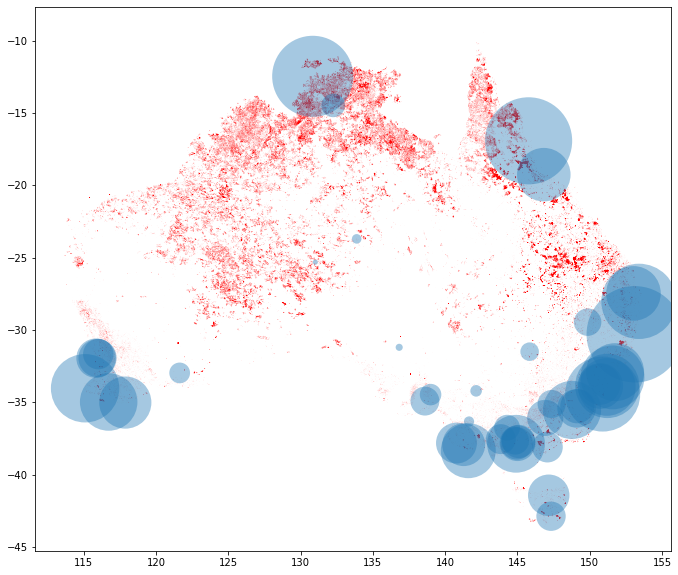

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import math
df3 = pd.read_csv('datasets/stationsCoordinates.csv')
plt.rcParams["figure.figsize"] = (20, 10)

X = df3['Longitude']
Y = df3['Latitude']
cities = df3["City"].tolist()
RainOccurence = np.zeros(len(cities))

for ind in df2.index:
    RainOccurence[cities.index(df2["Location"][ind])] += np.nan_to_num(df2["Rainfall"][ind])

print(RainOccurence)
figure, axes = plt.subplots()

axes.scatter(df1['longitude'],df1['latitude'],c="red",marker = 'o', s=0.000007)
axes.set_aspect(1)

for ind in range(len(cities)):
    draw_circle = plt.Circle((X[ind], Y[ind]),RainOccurence[ind]/1000,alpha=0.4)
    axes.add_artist(draw_circle)

plt.show()